In [2]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# read the dataset using pandas
data = pd.read_csv('C://Users//lmohan2//Desktop//New folder//test//Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [5]:
# this describes the basic stat behind the dataset used 
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\lmohan2\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

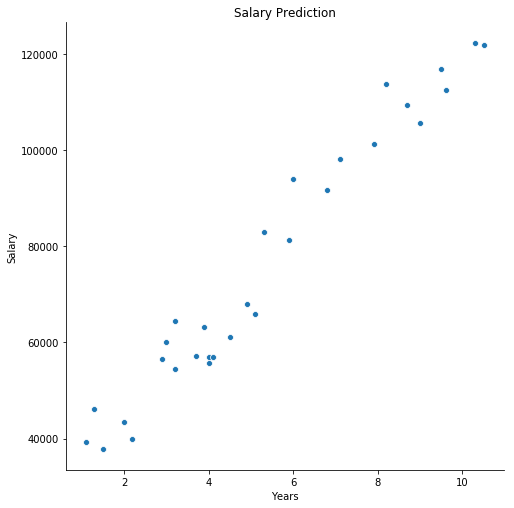

In [5]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [7]:
# Cooking the data
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [8]:
# Cooking the data
y = data['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [12]:
# Import Segregating data from scikit learn
from sklearn.model_selection import train_test_split
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)
# Create new axis for x column
X_train = X_train[ :,np.newaxis]
X_test = X_test[:,np.newaxis]
#we need to convert this to 2d array


In [13]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

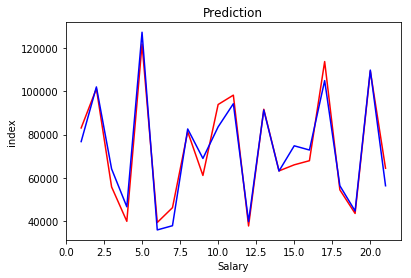

In [30]:
# Predicting the Salary for the Train values
y_predicted=lr.predict(X_train)
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_train)+1,1)]
plt.plot(c,y_train,color='r',linestyle='-')
plt.plot(c,y_predicted,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [23]:
# Predicting the Salary for the Test values
y_pred = lr.predict(X_test)

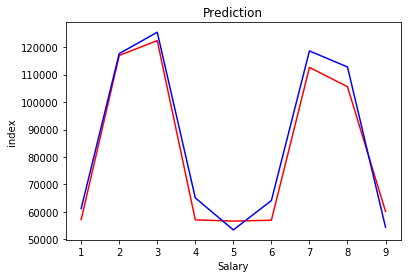

In [24]:
# Plotting the actual and predicted values for the test data

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

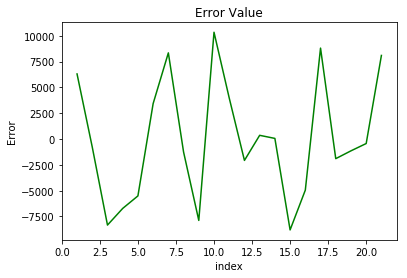

In [31]:
# plotting the error
c = [i for i in range(1,len(y_train)+1,1)]
plt.plot(c,y_train-y_predicted,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [43]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
# Calculate R square vale
rsq = r2_score(y_train,y_predicted)
#print('mean squared error:',mse) 
print('R SQUARE:',rsq) 


R SQUARE: 0.9489148127897334


In [42]:
#RMSE
from math import sqrt
rms_d = sqrt(mean_squared_error(y_train,y_predicted))
print('RMSE:',rms_d) 

RMSE: 5807.962456689544


In [44]:
#Mean absolute Error

from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_train,y_predicted))

MAE 4739.749072750417


In [45]:
#Mean square Error
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_train,y_predicted))

MSE 33732427.898315236


In [46]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

#y = 25202.8 + 9731.2x

Intercept of the model: 25202.887786154883
Coefficient of the line: [9731.20383825]
